## Plotting with Seaborn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

In [85]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [86]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [87]:
# let's find out how many continents are mentioned
continent = df['Continent'].unique()
continent

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

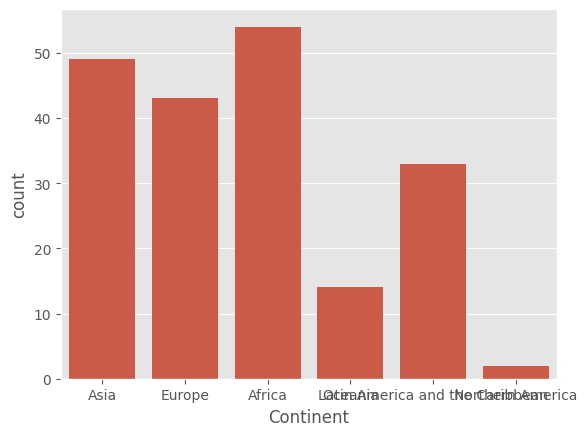

In [37]:
# Countplot
sns.countplot(x='Continent', data=df)

The labels on the x-axis doesnot look as expected.
Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America",
and change the figure size and then display the plot again

In [38]:
df1 = df.replace('Latin America and the Caribbean', 'L-America')
df1 = df1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

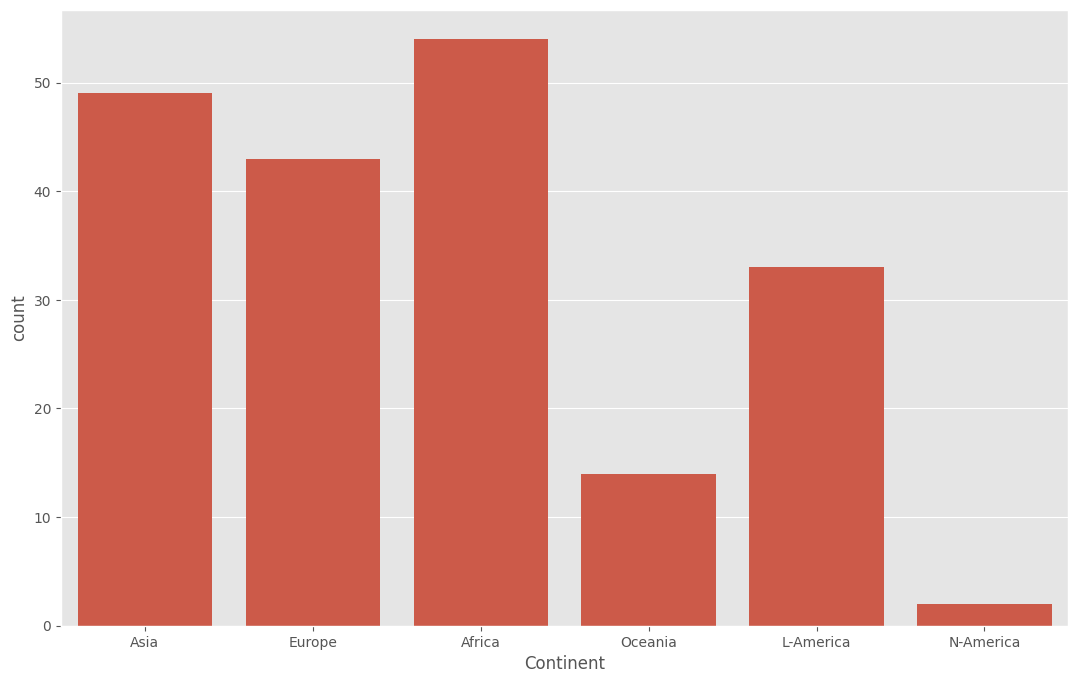

In [39]:
plt.figure(figsize=(13,8))
sns.countplot(x='Continent', data=df1)

### Barplot
**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise


<Axes: xlabel='Continent', ylabel='Total'>

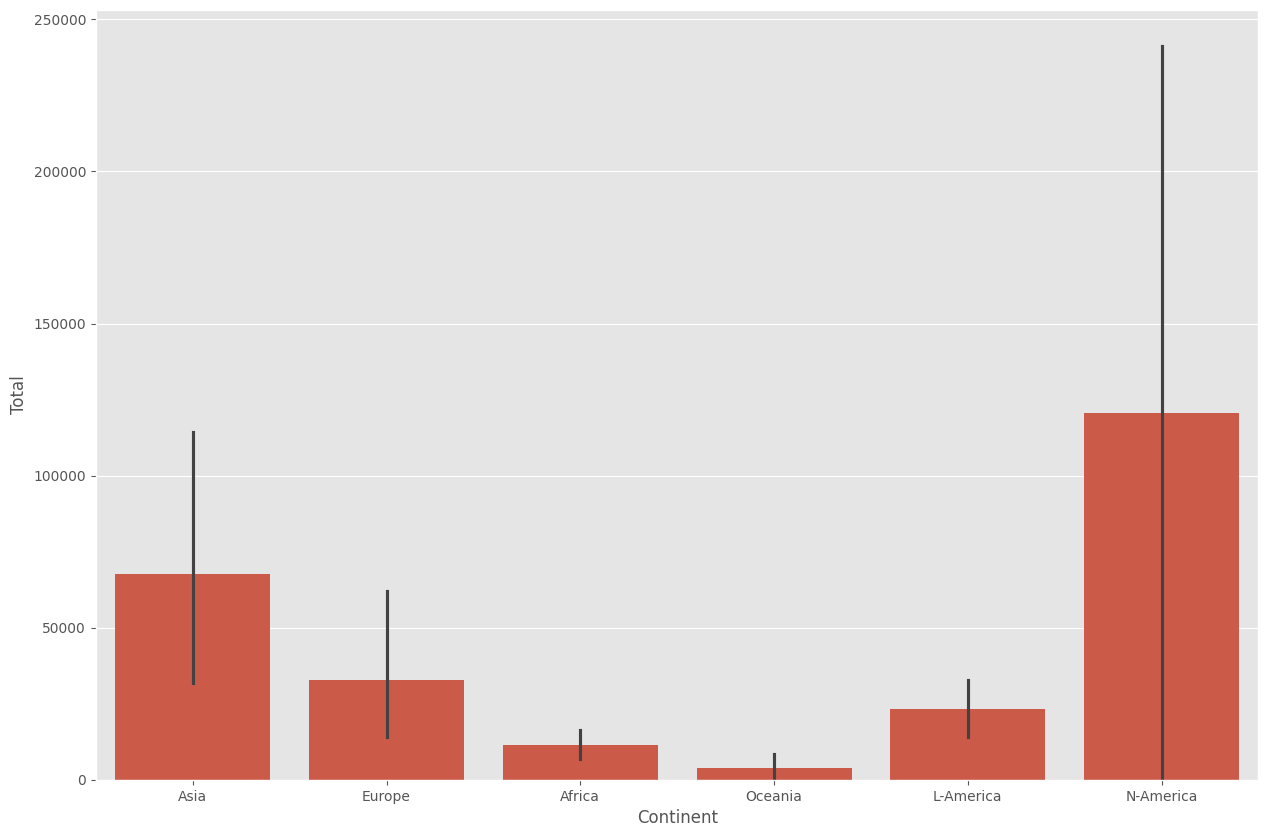

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent', y='Total', data=df1)

You can verify the values by performing the groupby on the Total and Continent for mean()


In [42]:
df2 = df1.groupby('Continent')['Total'].mean()
df2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [66]:
years = list(map(str, range(1980, 2014)))
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

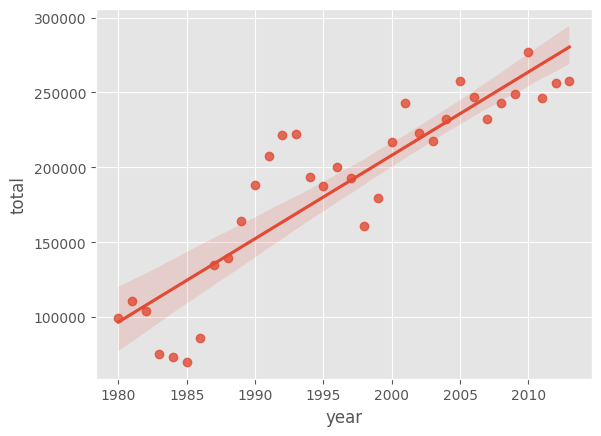

In [69]:
sns.regplot(x='year', y='total', data=df_tot)

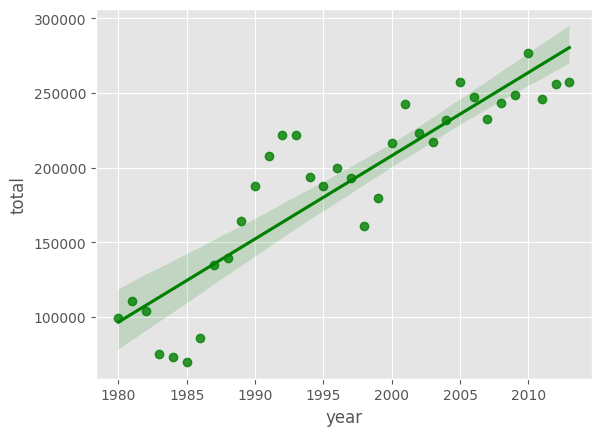

In [71]:
# Let's change the color to green
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

You can always customize the marker shape, so instead of circular markers, let's use `+`.

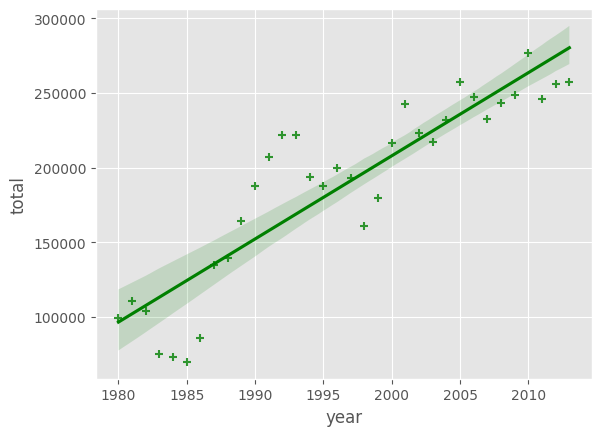

In [72]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

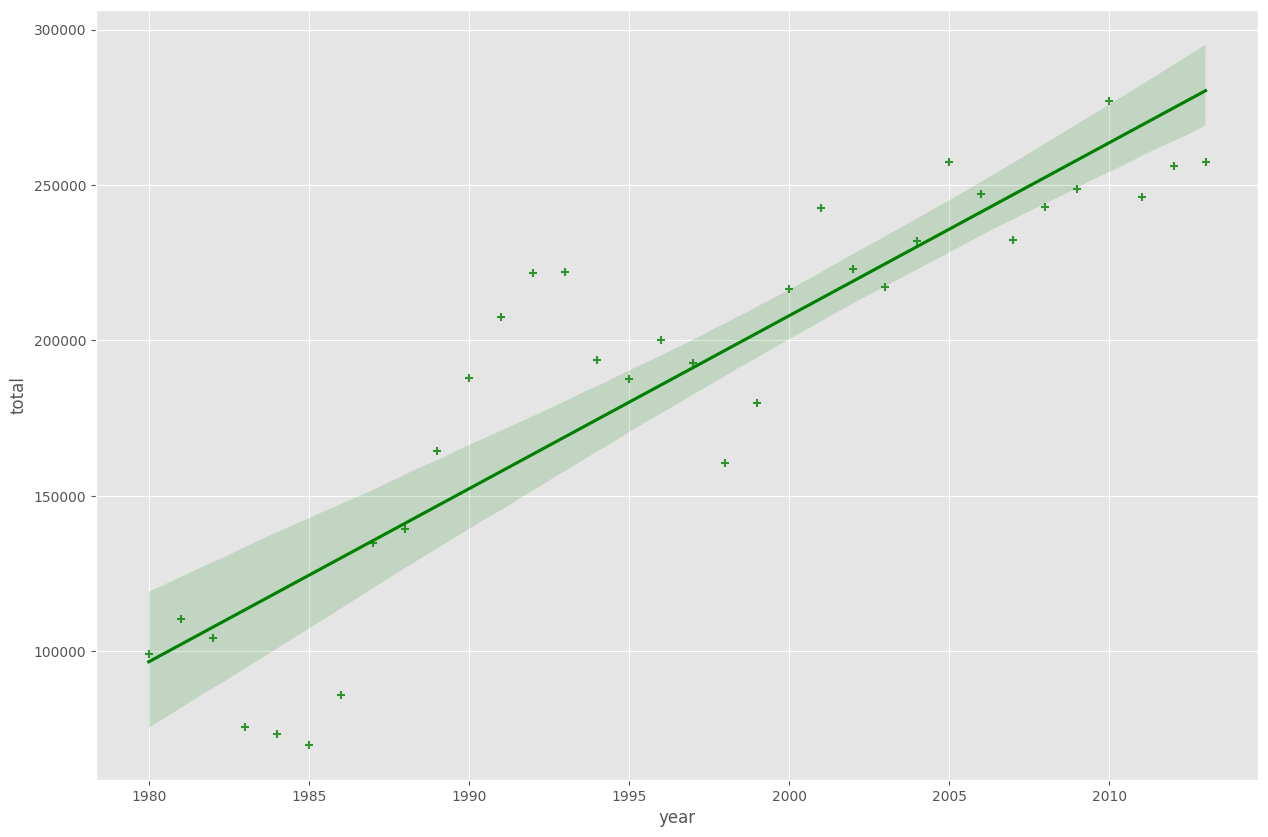

In [73]:
plt.figure(figsize=(15,10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

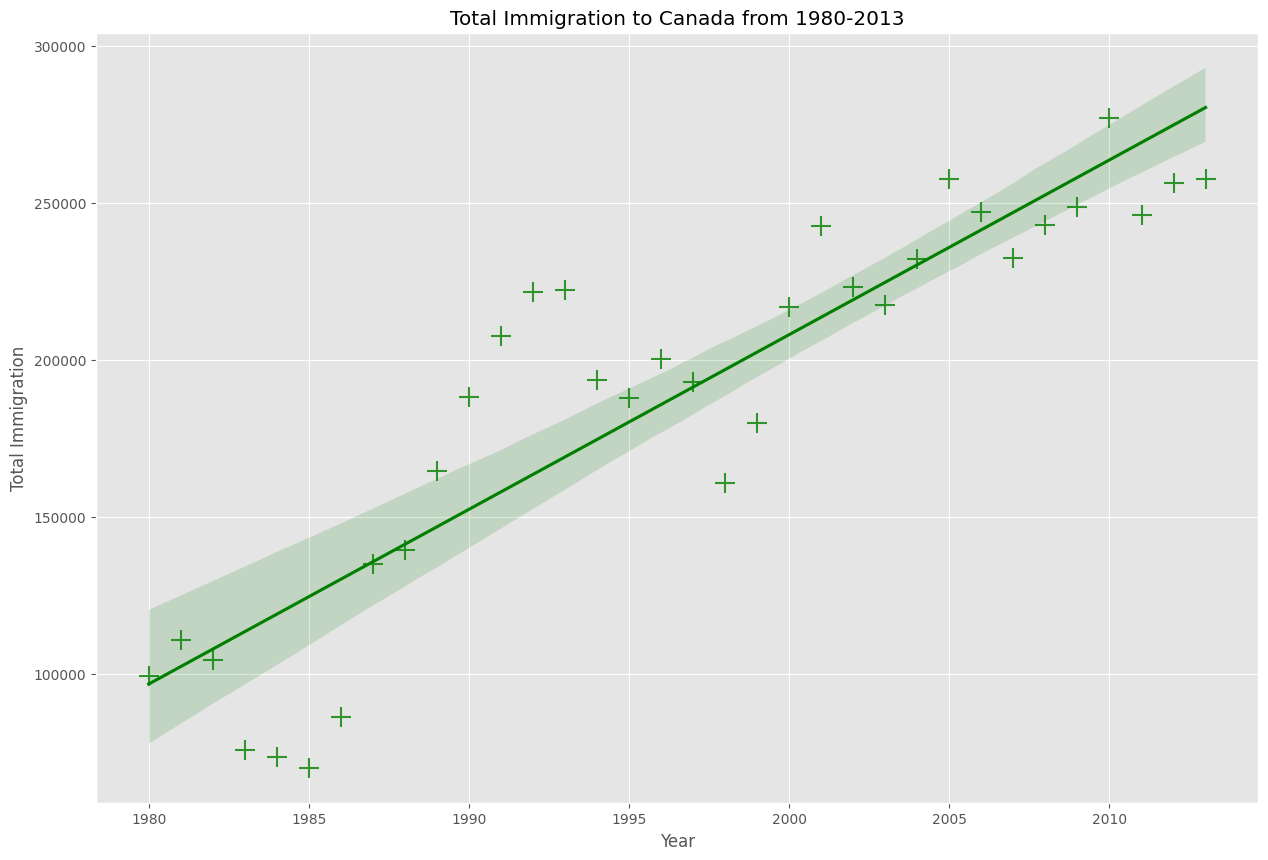

In [75]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')
plt.show()

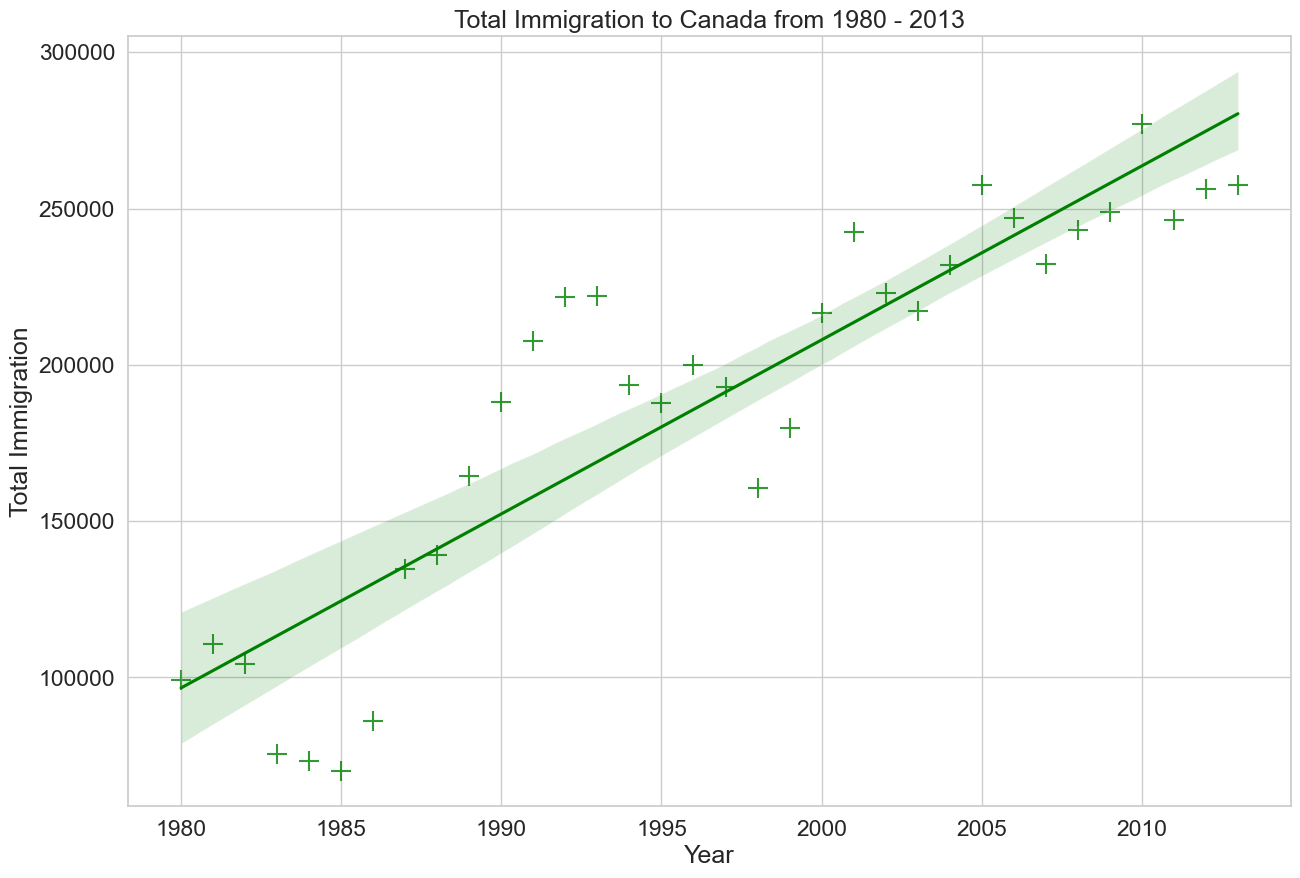

In [77]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [88]:
df_dns = df
df_dns.set_index('Country', inplace=True)

In [96]:
df_dns = df_dns.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [98]:
df_dns = pd.DataFrame(df_dns.sum(axis=1))

In [100]:
df_dns.reset_index(inplace=True)

In [102]:
df_dns.columns = ['year','total']

In [104]:
df_dns['year'] = df_dns['year'].astype(int)

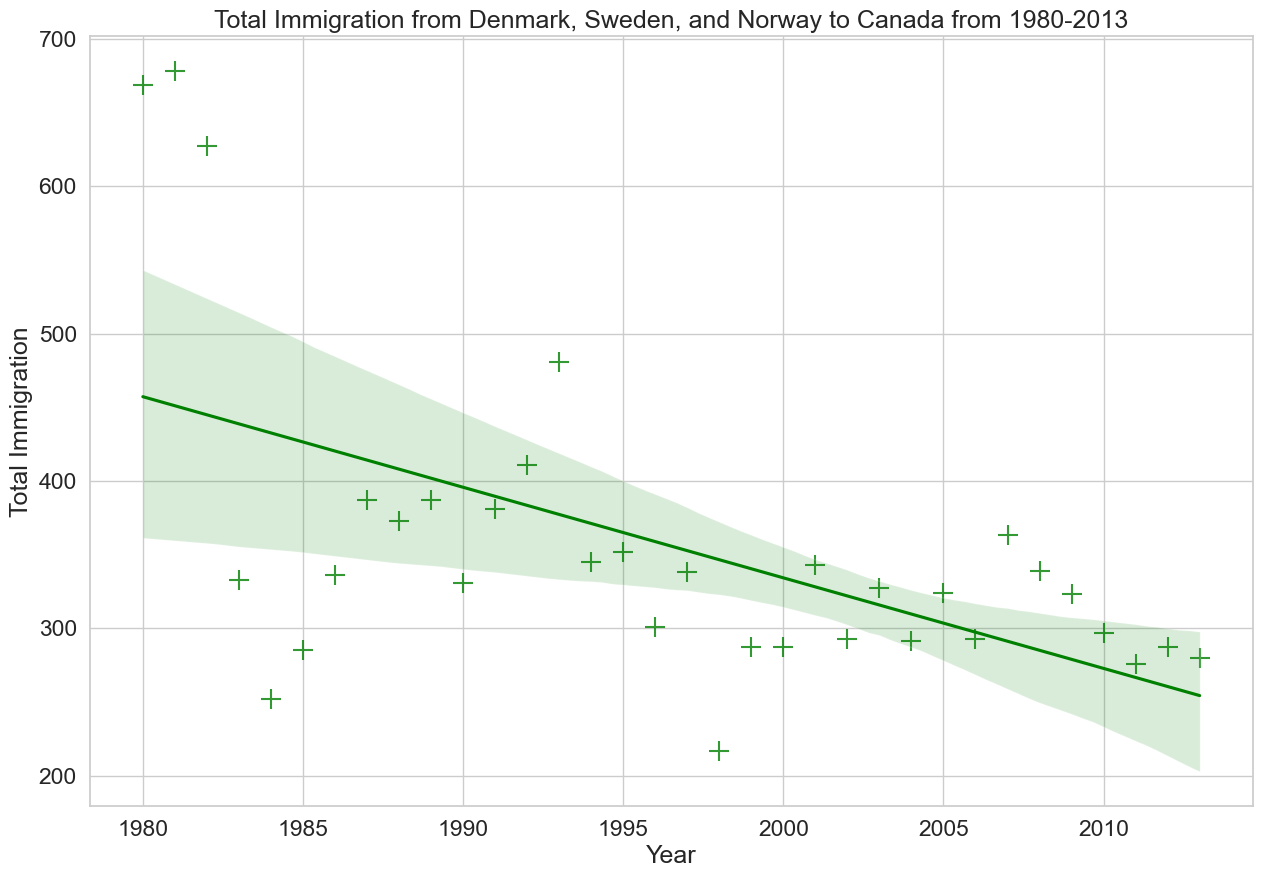

In [106]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_dns, color='green', marker='+',scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')
plt.show()

### Thank you
## Author

[Neelesh Chidar](https://www.linkedin.com/in/neeleshchidar37/)